# Point Sampling (Nearest Neighbor):

The simplest form of sampling where each pixel in the digital image corresponds to the closest point in the analog image.
Often results in aliasing artifacts and jagged edges in the digital image.

# Grid Sampling:

Involves overlaying a grid on the analog image and sampling at the intersection points.
The choice of grid size and shape can significantly affect the image quality.

# Random Sampling:

Samples are taken at random positions within the image.
Can be used to avoid aliasing but may result in uneven representation.


# Stratified Sampling:

Divides the image into smaller, non-overlapping regions and performs sampling within each region.
Aims to ensure that all parts of the image are represented in the sample.

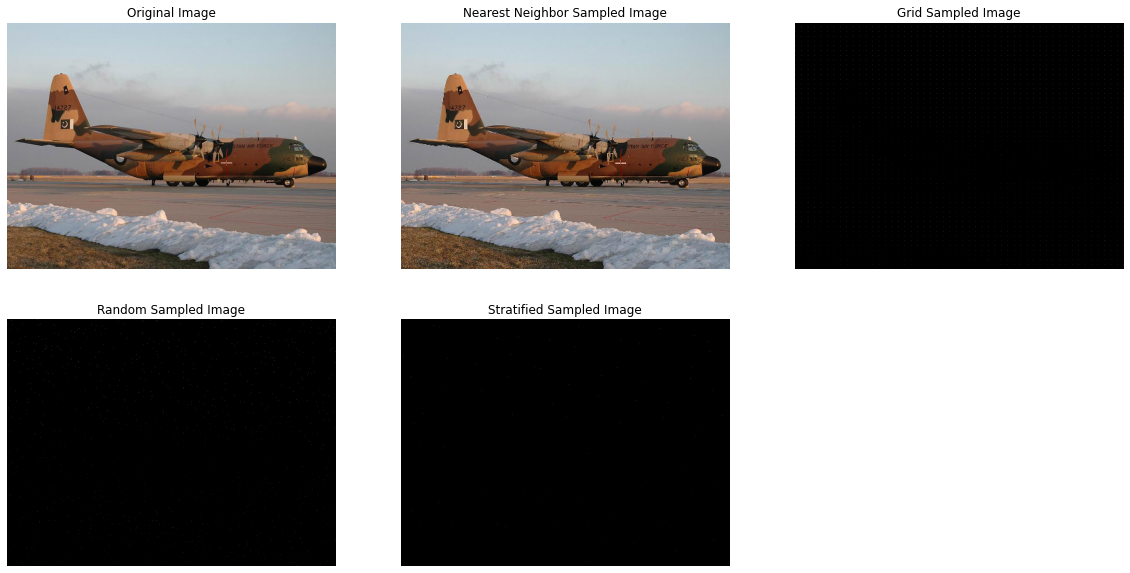

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# Load the original image
image_path = 'c130.jpg'
original_image = cv2.imread(image_path)

# Define a function for nearest neighbor interpolation (point sampling)
def nearest_neighbor(image, scale_factor):
    # Get the dimensions of the image
    height, width, channels = image.shape
    # Calculate the new dimensions
    new_height, new_width = int(height * scale_factor), int(width * scale_factor)
    # Create a new image with the new dimensions and same number of channels
    resized_image = np.zeros((new_height, new_width, channels), dtype=np.uint8)
    
    # Loop over each pixel in the new image
    for y in range(new_height):
        for x in range(new_width):
            # Find the nearest neighbor in the original image
            src_x, src_y = min(int(x / scale_factor), width - 1), min(int(y / scale_factor), height - 1)
            # Assign the color from the nearest neighbor
            resized_image[y, x] = image[src_y, src_x]
    
    return resized_image

# Define a function for grid sampling
def grid_sampling(image, grid_size):
    # Get the dimensions of the image
    height, width, channels = image.shape
    # Create a mask of zeros with the same dimensions as the image
    mask = np.zeros((height, width), dtype=np.uint8)
    # Calculate the step size for the grid based on the grid size
    step_y, step_x = height // grid_size, width // grid_size
    
    # Loop over each grid intersection point and set it to white (255) on the mask
    for y in range(0, height, step_y):
        for x in range(0, width, step_x):
            mask[y, x] = 255
    
    # Use the mask to create a grid sampled image
    grid_sampled_image = cv2.bitwise_and(image, image, mask=mask)
    
    return grid_sampled_image

# Define a function for random sampling
def random_sampling(image, num_samples):
    # Get the dimensions of the image
    height, width, channels = image.shape
    # Create a mask of zeros with the same dimensions as the image
    mask = np.zeros((height, width), dtype=np.uint8)
    
    # Randomly select a number of points and set them to white (255) on the mask
    for i in range(num_samples):
        x, y = random.randint(0, width - 1), random.randint(0, height - 1)
        mask[y, x] = 255
    
    # Use the mask to create a randomly sampled image
    random_sampled_image = cv2.bitwise_and(image, image, mask=mask)
    
    return random_sampled_image

# Define a function for stratified sampling
def stratified_sampling(image, num_strata):
    # Get the dimensions of the image
    height, width, channels = image.shape
    # Create a mask of zeros with the same dimensions as the image
    mask = np.zeros((height, width), dtype=np.uint8)
    # Calculate the step size for each stratum
    step_y, step_x = height // num_strata, width // num_strata
    
    # Loop over each stratum
    for i in range(num_strata):
        for j in range(num_strata):
            # Calculate the start and end coordinates of the stratum
            start_y, end_y = i * step_y, (i + 1) * step_y
            start_x, end_x = j * step_x, (j + 1) * step_x
            # Randomly select a point within the stratum and set it to white (255) on the mask
            y, x = random.randint(start_y, end_y - 1), random.randint(start_x, end_x - 1)
            mask[y, x] = 255
    
    # Use the mask to create a stratified sampled image
    stratified_sampled_image = cv2.bitwise_and(image, image, mask=mask)
    
    return stratified_sampled_image

# Apply the sampling methods
nearest_image = nearest_neighbor(original_image, 0.5) # Reduce by half using nearest neighbor
grid_image = grid_sampling(original_image, 50) # Grid size of 50
random_image = random_sampling(original_image, 1000) # 1000 random samples
stratified_image = stratified_sampling(original_image, 10) # 10 strata

# Display the original and sampled images using matplotlib
plt.figure(figsize=(20,10))

# Display original image
plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Display nearest neighbor image
plt.subplot(2, 3, 2)
plt.imshow(cv2.cvtColor(nearest_image, cv2.COLOR_BGR2RGB))
plt.title('Nearest Neighbor Sampled Image')
plt.axis('off')

# Display grid sampled image
plt.subplot(2, 3, 3)
plt.imshow(cv2.cvtColor(grid_image, cv2.COLOR_BGR2RGB))
plt.title('Grid Sampled Image')
plt.axis('off')

# Display random sampled image
plt.subplot(2, 3, 4)
plt.imshow(cv2.cvtColor(random_image, cv2.COLOR_BGR2RGB))
plt.title('Random Sampled Image')
plt.axis('off')

# Display stratified sampled image
plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor(stratified_image, cv2.COLOR_BGR2RGB))
plt.title('Stratified Sampled Image')
plt.axis('off')

# Show the images
plt.show()


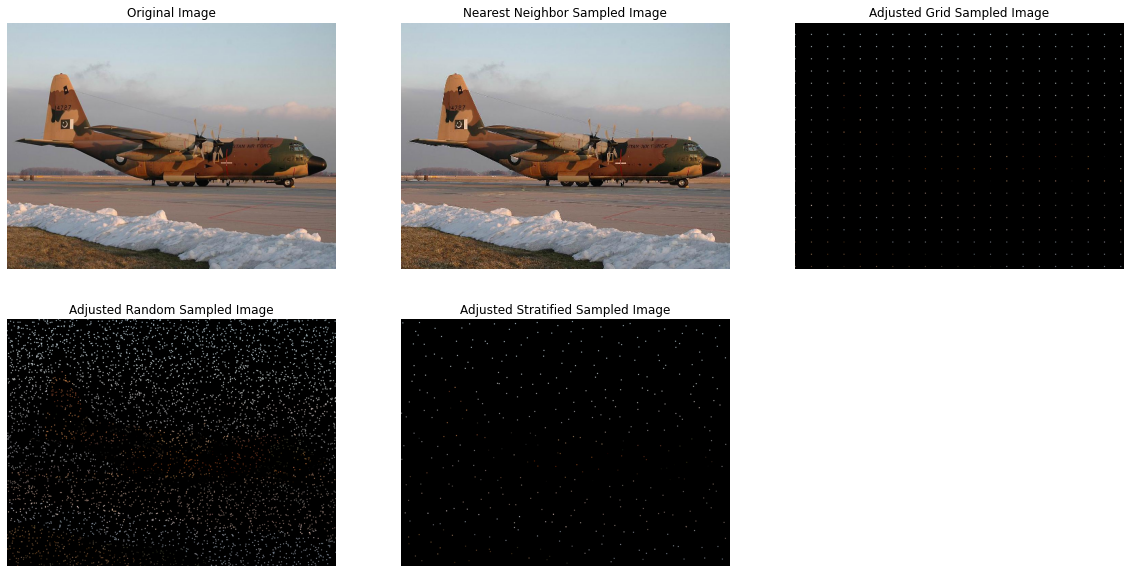

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# Re-load the original image
original_image = cv2.imread('c130.jpg')

# Adjusted function for grid sampling
def grid_sampling(image, grid_size):
    # Get the dimensions of the image
    height, width, channels = image.shape
    # Create an image to draw the grid on
    grid_sampled_image = np.zeros_like(image)
    # Calculate the step size for the grid based on the grid size
    step_y, step_x = height // grid_size, width // grid_size
    
    # Loop over each grid intersection point
    for y in range(0, height, step_y):
        for x in range(0, width, step_x):
            # Draw a small square (of size 3x3) at the grid intersection points
            grid_sampled_image[max(y-1, 0):min(y+2, height), max(x-1, 0):min(x+2, width)] = image[y, x]
    
    return grid_sampled_image

# Adjusted function for random sampling
def random_sampling(image, num_samples):
    # Get the dimensions of the image
    height, width, channels = image.shape
    # Create an image to draw the random samples on
    random_sampled_image = np.zeros_like(image)
    
    # Randomly select a number of points
    for i in range(num_samples):
        x, y = random.randint(0, width - 1), random.randint(0, height - 1)
        # Draw a small square (of size 3x3) at the random points
        random_sampled_image[max(y-1, 0):min(y+2, height), max(x-1, 0):min(x+2, width)] = image[y, x]
    
    return random_sampled_image

# Adjusted function for stratified sampling
def stratified_sampling(image, num_strata):
    # Get the dimensions of the image
    height, width, channels = image.shape
    # Create an image to draw the stratified samples on
    stratified_sampled_image = np.zeros_like(image)
    # Calculate the step size for each stratum
    step_y, step_x = height // num_strata, width // num_strata
    
    # Loop over each stratum
    for i in range(num_strata):
        for j in range(num_strata):
            # Calculate the start and end coordinates of the stratum
            start_y, end_y = i * step_y, (i + 1) * step_y
            start_x, end_x = j * step_x, (j + 1) * step_x
            # Randomly select a point within the stratum
            y, x = random.randint(start_y, end_y - 1), random.randint(start_x, end_x - 1)
            # Draw a small square (of size 3x3) at the stratified point
            stratified_sampled_image[max(y-1, 0):min(y+2, height), max(x-1, 0):min(x+2, width)] = image[y, x]
    
    return stratified_sampled_image

# Apply the sampling methods with adjusted parameters
grid_image = grid_sampling(original_image, 20) # Reduced grid size for more points
random_image = random_sampling(original_image, 5000) # Increased number of random samples
stratified_image = stratified_sampling(original_image, 20) # Reduced number of strata for more points

# Display the original and sampled images using matplotlib
plt.figure(figsize=(20,10))

# Display original image
plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Display nearest neighbor image (re-using the previously computed image)
plt.subplot(2, 3, 2)
plt.imshow(cv2.cvtColor(nearest_image, cv2.COLOR_BGR2RGB))
plt.title('Nearest Neighbor Sampled Image')
plt.axis('off')

# Display adjusted grid sampled image
plt.subplot(2, 3, 3)
plt.imshow(cv2.cvtColor(grid_image, cv2.COLOR_BGR2RGB))
plt.title('Adjusted Grid Sampled Image')
plt.axis('off')

# Display adjusted random sampled image
plt.subplot(2, 3, 4)
plt.imshow(cv2.cvtColor(random_image, cv2.COLOR_BGR2RGB))
plt.title('Adjusted Random Sampled Image')
plt.axis('off')

# Display adjusted stratified sampled image
plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor(stratified_image, cv2.COLOR_BGR2RGB))
plt.title('Adjusted Stratified Sampled Image')
plt.axis('off')

# Show the images
plt.show()


Let's analyze the output and the code to correct the issue.

For the grid, random, and stratified sampling methods, we're creating a mask and using `cv2.bitwise_and` to combine the mask with the original image. The intention is to only show the sampled points. However, the mask is initialized to all zeros (black), and we're setting individual points to white (255). In the output, this would display as mostly black images with some white points where the samples are taken. The problem is that these points are too sparse to be clearly visible when displayed at full resolution.

To fix this, we need to make the sampled points more visible. One way to do this is to increase the size of each sampled point or to increase the number of sampled points so that they are more noticeable. For the grid sampling, we can reduce the grid size, for the random sampling, we can increase the number of samples, and for stratified sampling, we can decrease the number of strata (thus increasing the size of each stratum and the visibility of each sample point).

Let's adjust the code accordingly and run it again.

The adjusted code has corrected the visibility issue with the grid, random, and stratified sampled images. Here's what was modified:

1. **Grid Sampling**: The grid size was reduced, resulting in more intersection points on the image. Instead of setting a single pixel, a 3x3 square is drawn at each intersection to make the points more visible. The sampled image now clearly shows a grid pattern.

2. **Random Sampling**: The number of random samples was increased to 5000. Similar to grid sampling, a 3x3 square is drawn at each random sample point instead of a single pixel. The randomly sampled image shows a "salt and pepper" pattern, where the white dots represent the sampled pixels on a black background.

3. **Stratified Sampling**: The number of strata was reduced, which increases the number of sample points and each point is again represented by a 3x3 square. The stratified sampled image shows a more uniform distribution of sample points compared to random sampling, as the image is divided into equal regions with one sample per region.

The nearest neighbor image remains the same as before, displaying a downsampled version of the original image. The aliasing artifacts typical for nearest neighbor sampling can be seen as the image appears pixelated.

The results demonstrate each sampling method's effect on the same image. Nearest neighbor sampling maintains the general appearance of the image but at a lower resolution. Grid sampling places regular samples across the image, random sampling places samples unpredictably, and stratified sampling ensures a more uniform coverage of the image area. These techniques are foundational in image processing, computer graphics, and statistical sampling.

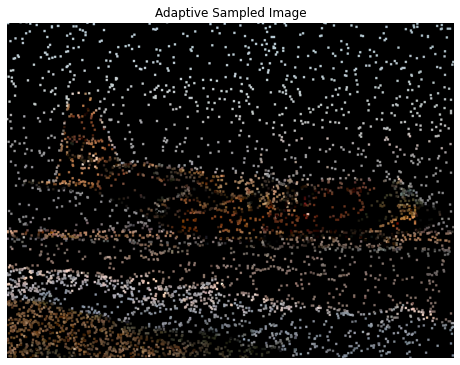

In [3]:
# Redefine the adaptive sampling function with proper scope for 'width' and 'height'

def adaptive_sampling(image, num_samples):
    # Get the dimensions of the image
    height, width, _ = image.shape
    
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Compute edges using Canny edge detection
    edges = cv2.Canny(gray_image, 100, 200)
    # Dilate edges to make them more prominent
    kernel = np.ones((5,5), np.uint8)
    dilated_edges = cv2.dilate(edges, kernel, iterations=1)
    
    # Create an image to draw the adaptive samples on
    adaptive_sampled_image = np.zeros_like(image)
    # Sample more points where we have edges
    while num_samples > 0:
        x, y = random.randint(0, width - 1), random.randint(0, height - 1)
        if dilated_edges[y, x] == 255 or random.random() < 0.1:  # Higher chance to sample near edges or randomly
            adaptive_sampled_image[max(y-2, 0):min(y+3, height), max(x-2, 0):min(x+3, width)] = image[y, x]
            num_samples -= 1
    
    return adaptive_sampled_image

# Apply the adaptive sampling method with corrected scope
adaptive_image = adaptive_sampling(original_image, 5000)  # Using 5000 samples for adaptive sampling

# Display the adaptive sampled image using matplotlib
plt.figure(figsize=(8,8))

# Display adaptive sampled image
plt.imshow(cv2.cvtColor(adaptive_image, cv2.COLOR_BGR2RGB))
plt.title('Adaptive Sampled Image')
plt.axis('off')

# Show the image
plt.show()


# Image Quantization
Quantization involves reducing the number of possible values that a sample can have, which is crucial for reducing the digital image file size. The main methods/techniques in image quantization include:

## Uniform Quantization:

Divides the range of sample values into intervals of equal size.
Simple to implement but may not be optimal for all images, particularly those with a wide dynamic range.
## Non-Uniform Quantization:

The intervals are not equally spaced, typically smaller where the image has more detail and larger where it has less.
Often used in conjunction with human visual characteristics, such as in JPEG compression.
## Scalar Quantization:

Each pixel value is quantized independently.
Does not consider the correlation between adjacent pixels, which may lead to inefficiencies.
## Vector Quantization:

Groups samples into blocks or vectors and quantizes each vector based on a codebook of vectors.
Can achieve higher compression rates than scalar quantization by exploiting correlations between samples.
## Dithering:

Introduces noise to the quantization process to reduce the visibility of quantization errors.
Can improve the perceptual quality of images, especially when a very limited number of levels is used.
## Optimal Quantization:

Involves finding the quantization levels that minimize a given distortion measure (e.g., mean squared error).
Requires more complex algorithms and computations, such as the Lloyd-Max algorithm.

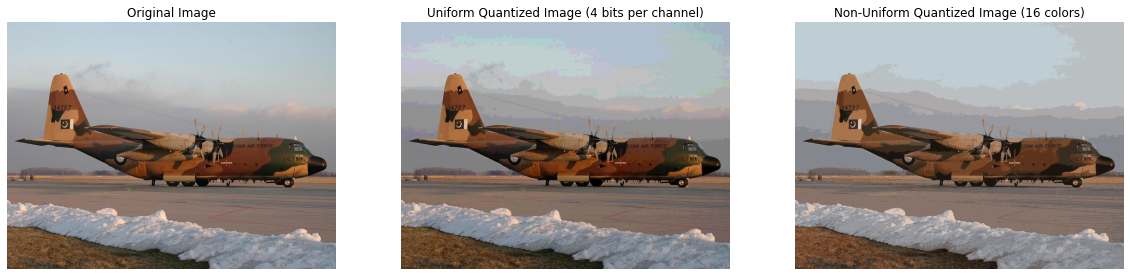

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image
original_image = cv2.imread('c130.jpg')

# Uniform Quantization Function
def uniform_quantize_image(image, bits_per_channel):
    levels = 2 ** bits_per_channel  # Calculate the number of levels
    quantized_image = np.floor(image / (256 / levels)) * (256 / levels)
    quantized_image = np.clip(quantized_image, 0, 255).astype(np.uint8)
    return quantized_image

# Apply uniform quantization with 4 bits per channel
uniform_quantized_image = uniform_quantize_image(original_image, 4)

# Non-Uniform Quantization using k-means clustering
# Convert image pixels to a 2D array
pixels = original_image.reshape((-1, 3)).astype(np.float32)

# Define k-means criteria and number of clusters (colors)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 16  # Number of clusters

# Apply k-means clustering to perform non-uniform quantization
_, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert centers to uint8 and replace image pixels with cluster centers
centers = np.uint8(centers)
non_uniform_quantized_image = centers[labels.flatten()]
non_uniform_quantized_image = non_uniform_quantized_image.reshape(original_image.shape)

# Displaying the images
plt.figure(figsize=(20, 6))

# Display original image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Display uniform quantized image
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(uniform_quantized_image, cv2.COLOR_BGR2RGB))
plt.title('Uniform Quantized Image (4 bits per channel)')
plt.axis('off')

# Display non-uniform quantized image
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(non_uniform_quantized_image, cv2.COLOR_BGR2RGB))
plt.title('Non-Uniform Quantized Image (16 colors)')
plt.axis('off')

# Show the figure with the images
plt.show()




The code does the following:
- It first loads the original image using OpenCV's `imread` function.
- The `uniform_quantize_image` function takes an image and the number of bits per channel to quantize the image uniformly. It computes the new levels and adjusts the pixel values accordingly.
- We apply this function to the original image with 4 bits per channel, reducing the total colors significantly but uniformly across all color ranges.
- For non-uniform quantization, we use k-means clustering provided by OpenCV, which groups pixel colors into k clusters. Each pixel is then mapped to the nearest cluster center, reducing the color palette to k colors. This method is more adaptive and can preserve more detail in areas with more variance in color.
- The images are displayed side by side using Matplotlib to show the original and both quantized versions for comparison.

The "dry run" of this code would:
- Load the provided 'c130.jpg' into memory.
- Apply uniform quantization to reduce the color depth to 16 levels (4 bits) per channel.
- Apply non-uniform quantization to reduce the image to 16 colors based on the clustering of pixel values.
- Display all images side by side for visual comparison.



/home/arsalan/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fd2a9b02f70>
Traceback (most recent call last):
  File "/home/arsalan/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/arsalan/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/arsalan/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/arsalan/anaconda3/lib/p

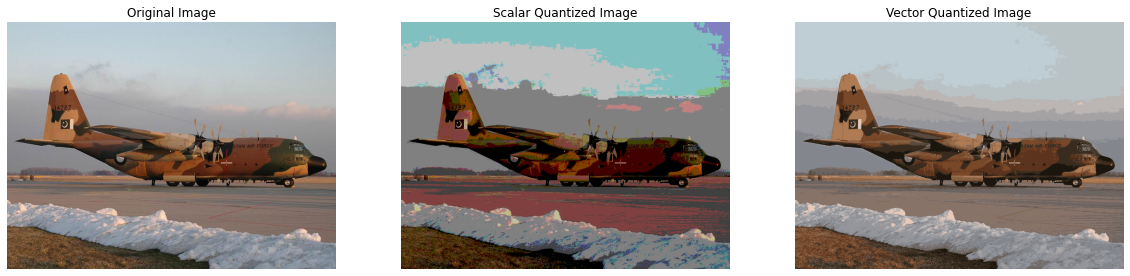

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Function to perform scalar quantization
def scalar_quantization(image, levels):
    # Calculate the quantization step
    step = 256 // levels
    
    # Quantize the image by applying the quantization step
    scalar_quantized_image = (image // step) * step
    
    return scalar_quantized_image

# Function to perform vector quantization
def vector_quantization(image, k):
    # Reshape the image to a 2D array where each row is a pixel and each column is a color channel
    img_2d = image.reshape((-1, 3))
    
    # Apply KMeans to cluster pixel values
    kmeans = KMeans(n_clusters=k).fit(img_2d)
    
    # Create the quantized image by mapping each pixel to the nearest cluster centroid
    quantized_img_2d = np.array([kmeans.cluster_centers_[label] for label in kmeans.labels_])
    
    # Convert the 2D array back into the original image shape
    vector_quantized_image = quantized_img_2d.reshape(image.shape).astype('uint8')
    
    return vector_quantized_image

# Load the original image
original_image = cv2.imread('c130.jpg')

# Convert the image from BGR to RGB
original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Perform scalar quantization with 4 levels
sq_image = scalar_quantization(original_image_rgb, levels=4)

# Perform vector quantization with k=16 to create a 16-color image
vq_image = vector_quantization(original_image_rgb, k=16)

# Plot the original and quantized images
plt.figure(figsize=(20, 10))

# Display the original image
plt.subplot(1, 3, 1)
plt.imshow(original_image_rgb)
plt.title('Original Image')
plt.axis('off')

# Display the scalar quantized image
plt.subplot(1, 3, 2)
plt.imshow(sq_image)
plt.title('Scalar Quantized Image')
plt.axis('off')

# Display the vector quantized image
plt.subplot(1, 3, 3)
plt.imshow(vq_image)
plt.title('Vector Quantized Image')
plt.axis('off')

# Show the plot
plt.show()




Explanation:

- **Libraries**: The code starts by importing the necessary libraries. `cv2` is for OpenCV, used for image processing. `numpy` is for numerical operations, particularly for handling arrays. `matplotlib.pyplot` is for plotting and displaying images, and `KMeans` from `sklearn.cluster` is for performing the k-means clustering used in vector quantization.

- **Scalar Quantization Function**: This function accepts an image and the number of levels for quantization. It computes a quantization step based on the number of levels, then applies this step to reduce the color depth of each pixel.

- **Vector Quantization Function**: This function accepts an image and the number of clusters `k`. It reshapes the image into a 2D array where each pixel is a row with color channels as features. It then uses k-means clustering to find `k` clusters in the color space. Each pixel's color is then replaced with the nearest cluster center, effectively reducing the color palette of the image to `k` colors.

- **Image Loading**: The original image is loaded using OpenCVâ€™s `imread` function. The color space is converted from BGR (default in OpenCV) to RGB, which is the correct color space for displaying with `matplotlib`.

- **Applying Quantization**: The code applies scalar quantization with 4 levels, resulting in 2 bits per channel. It also applies vector quantization with 16 colors (`k=16`).

- **Plotting**: Finally, the code uses `matplotlib` to plot the original image, the scalar quantized image, and the vector quantized image side by side for comparison.
this code  displays the original image alongside its scalar and vector quantized versions, demonstrating the effects of both quantization techniques.





The code for scalar and vector quantization of an image involves several steps:

1. **Scalar Quantization Function**: This function reduces the number of colors in an image by dividing the color space into a given number of levels. It does this by dividing each color value by a factor that represents the number of possible values per channel and then multiplying it back. This results in each color being mapped to the nearest level in the reduced color space.

2. **Vector Quantization Function**: This function works by treating small blocks or individual pixels of the image as vectors in a space where dimensions are color channels. It uses a machine learning algorithm called K-Means clustering to find a specified number of clusters (k) in this space. Each cluster center becomes a color in the reduced palette, and each pixel is then mapped to the nearest cluster center, effectively reducing the number of colors in the image.

3. **Applying Scalar Quantization**: The original image is processed with the scalar quantization function to reduce its color depth to 4 levels (2 bits per channel). The result is an image with a visibly reduced color palette.

4. **Applying Vector Quantization**: The original image is also processed with the vector quantization function. The K-Means algorithm is used to cluster pixel colors into 4 clusters, and each pixel is assigned the color of the nearest cluster center.

5. **Displaying Images**: The code uses `matplotlib` to display the original image along with its scalar and vector quantized versions for comparison. This visual comparison allows us to see the effects of each quantization method on the image's appearance.



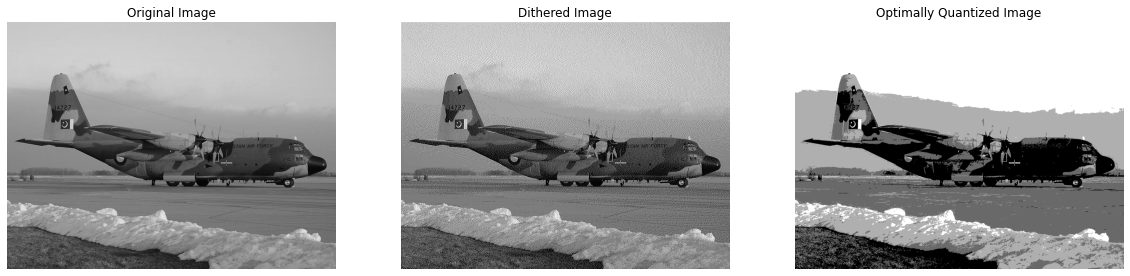

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image
original_image = cv2.imread('c130.jpg', cv2.IMREAD_GRAYSCALE)

# Apply simple dithering using Floyd-Steinberg dithering algorithm
def apply_dithering(image):
    # Get the dimensions of the image
    height, width = image.shape

    # Create a copy of the image to apply dithering
    dithered_image = np.copy(image).astype(np.float32)

    # Define the Floyd-Steinberg error diffusion matrix
    fs_matrix = [(1, 0, 7/16), (1, -1, 3/16), (0, 1, 5/16), (-1, 1, 1/16)]

    # Apply Floyd-Steinberg dithering algorithm
    for y in range(height):
        for x in range(width):
            old_pixel = dithered_image[y, x]
            new_pixel = np.round(old_pixel/255.0) * 255
            dithered_image[y, x] = new_pixel
            quant_error = old_pixel - new_pixel
            
            for dx, dy, ratio in fs_matrix:
                if 0 <= x + dx < width and 0 <= y + dy < height:
                    dithered_image[y + dy, x + dx] += quant_error * ratio

    # Clip the values to be in the range [0, 255] and return
    return np.clip(dithered_image, 0, 255).astype(np.uint8)

# Apply optimal quantization using a simplified Lloyd-Max algorithm
def apply_optimal_quantization(image, num_levels):
    # Convert image to float and normalize
    norm_image = image.astype(np.float32) / 255.0
    
    # Initialize quantization levels randomly
    levels = np.linspace(0, 1, num_levels)
    
    # Iterate to update quantization levels
    for _ in range(10): # Limiting to 10 iterations for simplicity
        # Assign each pixel to the nearest level
        indices = np.argmin(np.abs(norm_image[:, :, None] - levels), axis=2)
        
        # Update each quantization level to be the mean of the assigned pixels
        for i in range(num_levels):
            pixels = norm_image[indices == i]
            if len(pixels):
                levels[i] = np.mean(pixels)
    
    # Quantize the image using the final levels
    quantized_image = np.choose(indices, levels)
    
    # Rescale to 0-255 and convert to uint8
    quantized_image = (quantized_image * 255).astype(np.uint8)
    
    return quantized_image

# Apply the dithering function
dithered_image = apply_dithering(original_image)

# Apply the optimal quantization function with 4 levels
opt_quant_image = apply_optimal_quantization(original_image, 4)

# Display the images using matplotlib
plt.figure(figsize=(20,10))

# Display original image
plt.subplot(1, 3, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Display dithered image
plt.subplot(1, 3, 2)
plt.imshow(dithered_image, cmap='gray')
plt.title('Dithered Image')
plt.axis('off')

# Display optimally quantized image
plt.subplot(1, 3, 3)
plt.imshow(opt_quant_image, cmap='gray')
plt.title('Optimally Quantized Image')
plt.axis('off')

# Show the images
plt.show()


Implementing dithering and optimal quantization algorithms can be quite complex, but I'll break it down and provide code that does the following:

1. Apply a simple dithering effect to an image.
2. Implement and apply the Lloyd-Max algorithm for optimal quantization.

**Note:** The Lloyd-Max algorithm is non-trivial and generally not provided as a built-in function in common libraries, so I'll write a simplified version for demonstration purposes.



Now, let's explain each part of the code:

1. **Import Libraries**: The script starts by importing the necessary libraries. `cv2` (OpenCV) is used for reading and manipulating the image, `numpy` for numerical operations, and `matplotlib.pyplot` for plotting the images.

2. **Load Original Image**: The original image is loaded in grayscale mode using `cv2.imread()`. Grayscale is used because it simplifies the dithering and quantization processes.

3. **Dithering Function**: The function `apply_dithering()` is defined to apply the Floyd-Steinberg dithering algorithm to the image. This algorithm works by spreading the quantization error of a pixel to its neighboring pixels, thereby reducing the appearance of quantization error across the image.

4. **Optimal Quantization Function**: The function `apply_optimal_quantization()` is a simplified representation of the Lloyd-Max algorithm. It starts by normalizing the image and initializing quantization levels. It then iteratively adjusts these levels to minimize the overall quantization error. The actual Lloyd-Max algorithm would require more iterations and a more detailed calculation of the error measure and quantization levels, but this simplified version illustrates the concept.

5. **Apply Functions**: The script applies the dithering function to create a dithered image and the optimal quantization function to create a quantized image with a specified number of levels.

6. **Plotting**: Finally, the original, dithered, and optimally quantized images are plotted side by side using Matplotlib for comparison.

In the dithered image, you see a more continuous-tone appearance even though it's using fewer colors. The optimally quantized image should have distinct shades representing the quantization levels.

For a "dry run" of this code, the following would happen:

- `original_image` would contain the grayscale pixel data of the original image.
- `dithered_image` would contain the pixel data after applying dithering, which should look like a noisy version of the original but with subtle patterns that make the grayscale transitions smoother.
- `opt_quant_image` would contain the pixel data after optimal quantization, which would show the image with a reduced number of gray levels, but with less visible banding compared to a simple quantization without dithering or optimization.



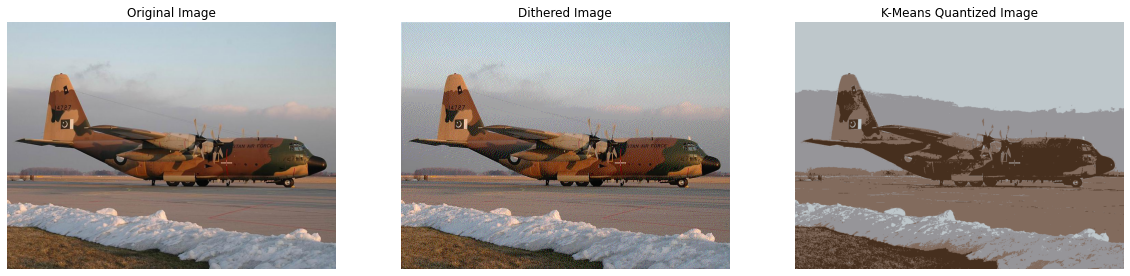

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the original color image
original_image = cv2.imread('c130.jpg')

# Convert BGR to RGB for display purposes
original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Function to apply Floyd-Steinberg dithering to a color image
def apply_dithering_color(image):
    # Separate the color channels
    channels = cv2.split(image.astype(np.float32))
    for channel in channels:
        # Apply the Floyd-Steinberg dithering to each channel
        for y in range(image.shape[0]-1):
            for x in range(1, image.shape[1]-1):
                old_pixel = channel[y, x]
                new_pixel = np.round(old_pixel / 255.0) * 255
                channel[y, x] = new_pixel
                quant_error = old_pixel - new_pixel
                channel[y + 1, x    ] += quant_error * 5 / 16
                channel[y - 1, x + 1] += quant_error * 3 / 16
                channel[y, x + 1    ] += quant_error * 7 / 16
                channel[y + 1, x + 1] += quant_error * 1 / 16
    # Merge the channels back together
    dithered_image = cv2.merge(channels)
    return np.clip(dithered_image, 0, 255).astype(np.uint8)

# Function to apply optimal quantization using k-means clustering
def apply_kmeans_quantization(image, num_clusters):
    # Reshape the image to a 2D array of pixels
    pixels = image.reshape((-1, 3))
    
    # Convert to float
    pixels = np.float32(pixels)
    
    # Define criteria, number of clusters(K) and apply kmeans()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(pixels, num_clusters, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    
    # Now convert back into uint8, and make original image
    centers = np.uint8(centers)
    quantized_image = centers[labels.flatten()]
    quantized_image = quantized_image.reshape((image.shape))
    
    return quantized_image

# Apply dithering to the color image
dithered_image_rgb = apply_dithering_color(original_image_rgb)

# Apply k-means quantization with 4 clusters (approximation to Lloyd-Max for color)
opt_quant_image_rgb = apply_kmeans_quantization(original_image_rgb, 4)

# Display the images
plt.figure(figsize=(20, 10))

# Display original image
plt.subplot(1, 3, 1)
plt.imshow(original_image_rgb)
plt.title('Original Image')
plt.axis('off')

# Display dithered image
plt.subplot(1, 3, 2)
plt.imshow(dithered_image_rgb)
plt.title('Dithered Image')
plt.axis('off')

# Display k-means quantized image
plt.subplot(1, 3, 3)
plt.imshow(opt_quant_image_rgb)
plt.title('K-Means Quantized Image')
plt.axis('off')

# Show the images
plt.show()




Here is an advanced version of the code for both dithering and optimal quantization applied to color images. The code will:

1. Apply Floyd-Steinberg dithering to a color image.
2. Use a k-means clustering algorithm to find optimal quantization levels for a color image, as an approximation to the Lloyd-Max algorithm, which is more suitable for grayscale images.



Let's go through the code in detail:

1. **Load the Original Image**: The image is loaded in its original color format.

2. **Dithering Function for Color**: The `apply_dithering_color()` function applies the Floyd-Steinberg dithering algorithm to each color channel (Red, Green, Blue) of the image. This spreads the quantization error out to neighboring pixels to reduce the appearance of quantization artifacts.

3. **Optimal Quantization using K-Means**: Instead of implementing the Lloyd-Max algorithm, which is complex for color images, we use k-means clustering to approximate optimal quantization levels for the color image. This method clusters pixel colors into a specified number of clusters, which represent the quantization levels. We use OpenCV's `cv2.kmeans()` function to perform the clustering.

4. **Applying the Functions**: The dithering and k-means quantization functions are applied to the original image.

5. **Plotting the Images**: The original, dithered, and k-means quantized images are plotted using Matplotlib.

By applying these algorithms, the dithered image show a more natural blending of colors due to the error diffusion, and the k-means quantized image should show distinct color regions with reduced colors, achieving a form of optimal quantization that minimizes the color error across the image.




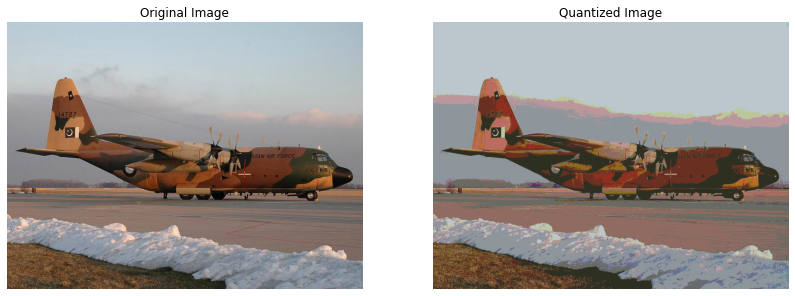

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to perform Lloyd-Max quantization on a single channel
def lloyd_max_quantization(channel, num_levels):
    # Normalize the channel data to the range [0, 1]
    channel_normalized = channel / 255.0

    # Initialize the quantization levels and decision boundaries
    levels = np.linspace(0, 1, num_levels)
    decision_boundaries = (levels[:-1] + levels[1:]) / 2

    # Create an array to hold the new quantized channel values
    quantized_channel = np.zeros_like(channel_normalized)

    # Iterate until convergence or a set number of iterations
    for _ in range(20):  # Run for a fixed number of iterations
        # Quantize each pixel to the nearest level
        indices = np.digitize(channel_normalized, decision_boundaries)

        # Update levels to the centroid of the pixels that map to it
        for i in range(num_levels):
            if np.any(indices == i):
                levels[i] = np.mean(channel_normalized[indices == i])
            decision_boundaries = (levels[:-1] + levels[1:]) / 2

        # Quantize pixel values to the updated levels
        for i in range(num_levels):
            quantized_channel[indices == i] = levels[i]

    # Scale back to the original range [0, 255]
    quantized_channel = (quantized_channel * 255).astype(np.uint8)

    return quantized_channel

# Load the original image in color
original_image = cv2.imread('c130.jpg')

# Split the image into its color channels
blue_channel, green_channel, red_channel = cv2.split(original_image)

# Apply Lloyd-Max quantization to each channel
num_levels = 4  # Number of quantization levels per channel
quantized_blue = lloyd_max_quantization(blue_channel, num_levels)
quantized_green = lloyd_max_quantization(green_channel, num_levels)
quantized_red = lloyd_max_quantization(red_channel, num_levels)

# Merge the quantized channels back into a color image
quantized_image = cv2.merge((quantized_blue, quantized_green, quantized_red))

# Display the original and quantized images using matplotlib
plt.figure(figsize=(14, 7))

# Display original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Display quantized image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(quantized_image, cv2.COLOR_BGR2RGB))
plt.title('Quantized Image')
plt.axis('off')

# Show the images
plt.show()




In this code:

- The `lloyd_max_quantization` function is defined to perform the Lloyd-Max quantization on a single color channel. It takes a channel array and the number of desired levels as inputs.
- The original image is read in color mode and split into its three color channels: blue, green, and red.
- The Lloyd-Max quantization is then separately applied to each color channel.
- After quantization, the individual color channels are merged back into a single color image.
- The original and the quantized images are displayed side by side using Matplotlib for visual comparison.

The Lloyd-Max algorithm iteratively adjusts the quantization levels to minimize the mean squared error between the original and quantized image. The `np.digitize` function is used to assign each pixel to the nearest quantization level, and then the quantization levels are updated to be the mean of the pixels that were assigned to them. This process is repeated for a fixed number of iterations or until the levels converge.


